In [321]:
from statistics import LinearRegression

import pandas as pd  # Für Datenauswertung
import tensorflow as tf  # TensorFlow 2.x
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential  # Keras-Modell
from tensorflow.keras.layers import Dense  # Keras-Schicht
from sklearn.model_selection import train_test_split  # Train/Test-Partitionierung
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score  # Bewertung
import matplotlib.pyplot as plt  # Visualisierung
import seaborn as sns

In [322]:
df = pd.read_csv("herford_weather.csv")

In [323]:
df.head()

,time,temperature_2m (°C),relativehumidity_2m (%),dewpoint_2m (°C),apparent_temperature (°C),pressure_msl (hPa),surface_pressure (hPa),precipitation (mm),rain (mm),snowfall (cm),...,et0_fao_evapotranspiration (mm),vapor_pressure_deficit (kPa),soil_temperature_0_to_7cm (°C),soil_temperature_7_to_28cm (°C),soil_temperature_28_to_100cm (°C),soil_temperature_100_to_255cm (°C),soil_moisture_0_to_7cm (m³/m³),soil_moisture_7_to_28cm (m³/m³),soil_moisture_28_to_100cm (m³/m³),soil_moisture_100_to_255cm (m³/m³)
0,1996-01-01T00:00,-2.3,80,-5.3,-7.2,1003.4,988.2,0.0,0.0,0.0,...,0.01,0.11,-1.7,-0.5,2.3,7.8,0.36,0.364,0.346,0.34
1,1996-01-01T01:00,-2.1,80,-5.2,-7.0,1003.8,988.6,0.0,0.0,0.0,...,0.01,0.11,-1.7,-0.5,2.3,7.8,0.36,0.364,0.346,0.34
2,1996-01-01T02:00,-2.0,79,-5.2,-6.9,1003.9,988.7,0.0,0.0,0.0,...,0.01,0.11,-1.7,-0.5,2.3,7.8,0.36,0.364,0.346,0.34
3,1996-01-01T03:00,-2.1,79,-5.3,-7.0,1004.0,988.8,0.0,0.0,0.0,...,0.01,0.11,-1.7,-0.5,2.3,7.8,0.36,0.364,0.346,0.34
4,1996-01-01T04:00,-2.2,78,-5.5,-7.1,1004.5,989.3,0.0,0.0,0.0,...,0.01,0.12,-1.7,-0.5,2.3,7.8,0.36,0.364,0.346,0.34


In [324]:
# vorarbeit
print(df.isnull().sum())


time                                  0
temperature_2m (°C)                   0
relativehumidity_2m (%)               0
dewpoint_2m (°C)                      0
apparent_temperature (°C)             0
pressure_msl (hPa)                    0
surface_pressure (hPa)                0
precipitation (mm)                    0
rain (mm)                             0
snowfall (cm)                         0
weathercode (wmo code)                0
cloudcover (%)                        0
cloudcover_low (%)                    0
cloudcover_mid (%)                    0
cloudcover_high (%)                   0
shortwave_radiation (W/m²)            0
direct_radiation (W/m²)               0
diffuse_radiation (W/m²)              0
direct_normal_irradiance (W/m²)       0
windspeed_10m (km/h)                  0
windspeed_100m (km/h)                 0
winddirection_10m (°)                 0
winddirection_100m (°)                0
windgusts_10m (km/h)                  0
et0_fao_evapotranspiration (mm)       0


In [325]:
df.dropna()

,time,temperature_2m (°C),relativehumidity_2m (%),dewpoint_2m (°C),apparent_temperature (°C),pressure_msl (hPa),surface_pressure (hPa),precipitation (mm),rain (mm),snowfall (cm),...,et0_fao_evapotranspiration (mm),vapor_pressure_deficit (kPa),soil_temperature_0_to_7cm (°C),soil_temperature_7_to_28cm (°C),soil_temperature_28_to_100cm (°C),soil_temperature_100_to_255cm (°C),soil_moisture_0_to_7cm (m³/m³),soil_moisture_7_to_28cm (m³/m³),soil_moisture_28_to_100cm (m³/m³),soil_moisture_100_to_255cm (m³/m³)
0,1996-01-01T00:00,-2.3,80,-5.3,-7.2,1003.4,988.2,0.0,0.0,0.0,...,0.01,0.11,-1.7,-0.5,2.3,7.8,0.360,0.364,0.346,0.340
1,1996-01-01T01:00,-2.1,80,-5.2,-7.0,1003.8,988.6,0.0,0.0,0.0,...,0.01,0.11,-1.7,-0.5,2.3,7.8,0.360,0.364,0.346,0.340
2,1996-01-01T02:00,-2.0,79,-5.2,-6.9,1003.9,988.7,0.0,0.0,0.0,...,0.01,0.11,-1.7,-0.5,2.3,7.8,0.360,0.364,0.346,0.340
3,1996-01-01T03:00,-2.1,79,-5.3,-7.0,1004.0,988.8,0.0,0.0,0.0,...,0.01,0.11,-1.7,-0.5,2.3,7.8,0.360,0.364,0.346,0.340
4,1996-01-01T04:00,-2.2,78,-5.5,-7.1,1004.5,989.3,0.0,0.0,0.0,...,0.01,0.12,-1.7,-0.5,2.3,7.8,0.360,0.364,0.346,0.340
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239565,2023-04-30T21:00,11.1,61,3.8,8.6,1021.2,1006.5,0.0,0.0,0.0,...,0.03,0.52,10.8,10.7,8.5,6.6,0.341,0.350,0.360,0.399
239566,2023-04-30T22:00,9.8,64,3.3,7.1,1021.3,1006.5,0.0,0.0,0.0,...,0.02,0.44,9.9,10.6,8.5,6.6,0.341,0.350,0.360,0.399
239567,2023-04-30T23:00,8.8,66,2.8,6.0,1021.1,1006.3,0.0,0.0,0.0,...,0.02,0.38,9.1,10.4,8.5,6.6,0.341,0.350,0.360,0.399
239568,2023-05-01T00:00,8.0,68,2.4,5.0,1020.6,1005.7,0.0,0.0,0.0,...,0.02,0.35,8.4,10.3,8.5,6.6,0.341,0.350,0.360,0.399


In [326]:
# = df.drop(columns=['time'])
#sns.heatmap(df_noTime.corr(), annot=True)
#plt.show()

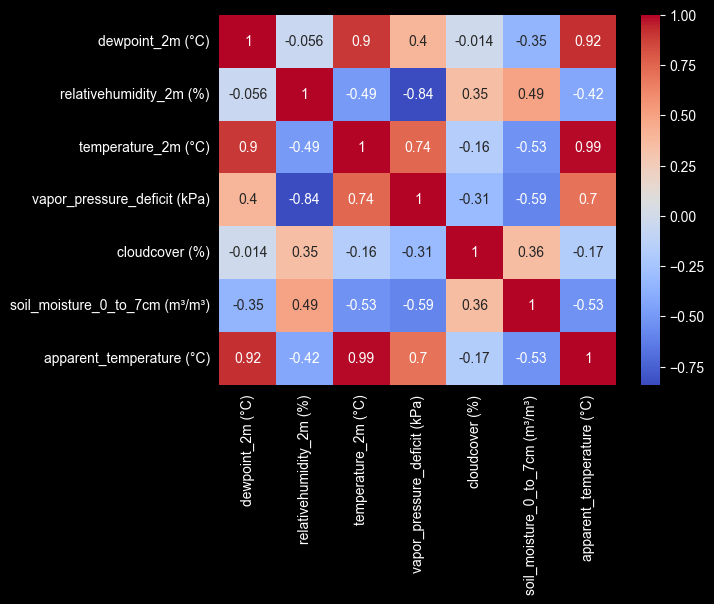

In [327]:
# irrelevant:
x = df[['relativehumidity_2m (%)', 'temperature_2m (°C)', 'vapor_pressure_deficit (kPa)','cloudcover (%)','soil_moisture_0_to_7cm (m³/m³)','apparent_temperature (°C)']]

#temperature important as in high temperature the drwpoint should be reached more easily
#cloudcover, sunbeams could make the drew drew faster
#humidity could have a big factor on the drewpoing
#vapor_pressure_deficit

xheatmap = df[['dewpoint_2m (°C)','relativehumidity_2m (%)', 'temperature_2m (°C)', 'vapor_pressure_deficit (kPa)','cloudcover (%)','soil_moisture_0_to_7cm (m³/m³)','apparent_temperature (°C)']]

sns.heatmap(xheatmap.corr(), annot=True,cmap='coolwarm')
plt.show()




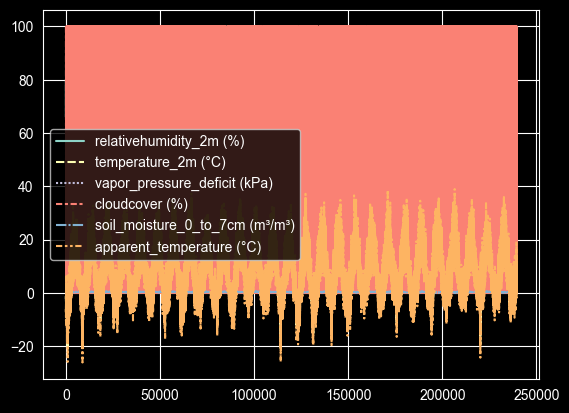

In [328]:
sns.lineplot(x)
plt.show()

In [329]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_scaled_array = scaler.fit_transform(x)

x_scaled = pd.DataFrame(x_scaled_array, columns=x.columns)

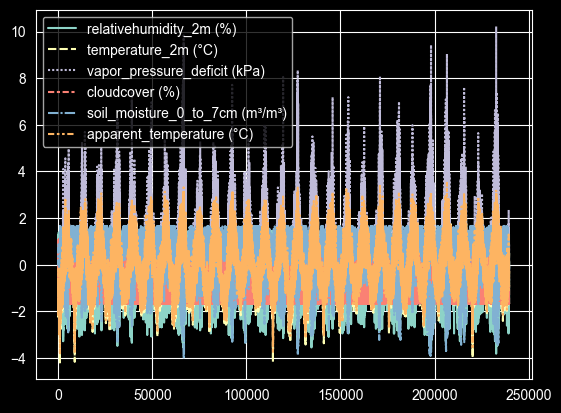

In [330]:
sns.lineplot(x_scaled)
plt.show()

In [331]:
# vorhersage von drewapoint_2m basierend auf den anderen
y = df['dewpoint_2m (°C)']

x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)#df.plot()
#plt.show()
print(x_test.shape,x_train.shape,y_train.shape,y_test.shape)

(47914, 6) (191656, 6) (191656,) (47914,)


import tensorflow as tf
from tensorflow.keras import layers

# Modell-Aufbau
slowmodel = tf.keras.Sequential([
    layers.Input(shape=(x_train.shape[1],)),
    layers.Dense(units=1)
])

# Kompilieren mit Optimizer und Verlustfunktion
slowmodel.compile(
    optimizer='adam',
    loss='mean_squared_error',
    metrics=['mae'] # Mittlerer absoluter Fehler zur besseren Lesbarkeit
)

# Training
historyslowmodel = slowmodel.fit(
    x_train, y_train,
    epochs=20,
    batch_size=8,
    validation_split=0.2,
    verbose=1
)


In [332]:
import tensorflow as tf
from tensorflow.keras import layers

# Modell-Aufbau
fastmodel = tf.keras.Sequential([
    layers.Input(shape=(x_train.shape[1],)),
    layers.Dense(units=1)
])

# Kompilieren mit Optimizer und Verlustfunktion
fastmodel.compile(
    optimizer='adam',
    loss='mean_squared_error',
    metrics=['mae'] # Mittlerer absoluter Fehler zur besseren Lesbarkeit
)

# Training
historyfastmodel = fastmodel.fit(
    x_train, y_train,
    epochs=10,
    batch_size=128,
    validation_split=0.2,
    verbose=1
)

Epoch 1/10
1198/1198 ━━━━━━━━━━━━━━━━━━━━ 1s 773us/step - loss: 58.9944 - mae: 6.5454 - val_loss: 44.3869 - val_mae: 5.7341
Epoch 2/10
1198/1198 ━━━━━━━━━━━━━━━━━━━━ 1s 694us/step - loss: 33.6070 - mae: 5.0107 - val_loss: 24.5480 - val_mae: 4.3439
Epoch 3/10
1198/1198 ━━━━━━━━━━━━━━━━━━━━ 1s 724us/step - loss: 17.8656 - mae: 3.7350 - val_loss: 12.3448 - val_mae: 3.1705
Epoch 4/10
1198/1198 ━━━━━━━━━━━━━━━━━━━━ 1s 732us/step - loss: 8.5770 - mae: 2.6673 - val_loss: 5.5645 - val_mae: 2.1965
Epoch 5/10
1198/1198 ━━━━━━━━━━━━━━━━━━━━ 1s 706us/step - loss: 3.6776 - mae: 1.7745 - val_loss: 2.2087 - val_mae: 1.3765
Epoch 6/10
1198/1198 ━━━━━━━━━━━━━━━━━━━━ 1s 706us/step - loss: 1.3632 - mae: 1.0381 - val_loss: 0.7383 - val_mae: 0.7381
Epoch 7/10
1198/1198 ━━━━━━━━━━━━━━━━━━━━ 1s 694us/step - loss: 0.4593 - mae: 0.5518 - val_loss: 0.2847 - val_mae: 0.4218
Epoch 8/10
1198/1198 ━━━━━━━━━━━━━━━━━━━━ 1s 704us/step - loss: 0.2415 - mae: 0.3809 - val_loss: 0.2159 - val_mae: 0.3569
Epoch 9/10
1198/11

import tensorflow as tf
from tensorflow.keras import layers

# Modell-Aufbau
defaultmodel = tf.keras.Sequential([
    layers.Input(shape=(x_train.shape[1],)),
    layers.Dense(units=1)
])

# Kompilieren mit Optimizer und Verlustfunktion
defaultmodel.compile(
    optimizer='adam',
    loss='mean_squared_error',
    metrics=['mae'] # Mittlerer absoluter Fehler zur besseren Lesbarkeit
)

# Training
historydefaultmodel = defaultmodel.fit(
    x_train, y_train,
    epochs=32,
    batch_size=20,
    validation_split=0.2,
    verbose=1
)

In [333]:
from sklearn.metrics import r2_score
y_predf = fastmodel.predict(x_test)
y_preds = slowmodel.predict(x_test)
y_predd = defaultmodel.predict(x_test)

r2f = r2_score(y_test, y_predf)
r2s = r2_score(y_test, y_preds)
r2d = r2_score(y_test, y_predd)

print(f'R2-Score fast: {r2f:.3f}')
print(f'R2-Score slow: {r2s:.3f}')
print(f'R2-Score default: {r2d:.3f}')

1498/1498 ━━━━━━━━━━━━━━━━━━━━ 0s 314us/step
1498/1498 ━━━━━━━━━━━━━━━━━━━━ 0s 319us/step
1498/1498 ━━━━━━━━━━━━━━━━━━━━ 0s 311us/step
R2-Score fast: 0.995
R2-Score slow: 0.997
R2-Score default: 0.997


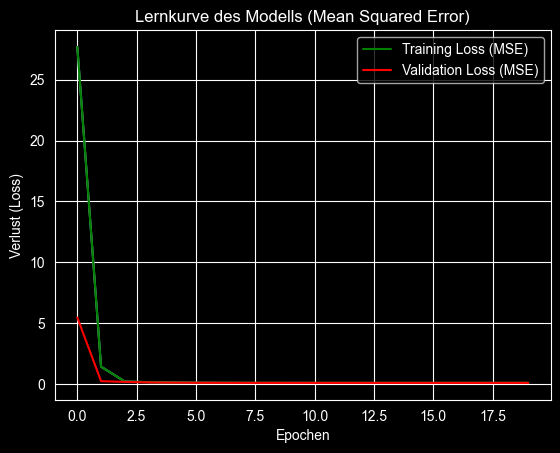

In [334]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(history.history['loss'])

# Plotten der Trainings- und Validierungsverlustkurve

# 'loss' ist der Fehler auf den Trainingsdaten
plt.plot(history.history['loss'], label='Training Loss (MSE)',color='green')
plt.plot(history.history['val_loss'], label='Validation Loss (MSE)',color='red')

plt.title('Lernkurve des Modells (Mean Squared Error)')
plt.xlabel('Epochen')
plt.ylabel('Verlust (Loss)')
plt.legend()
plt.grid(True)
plt.show()

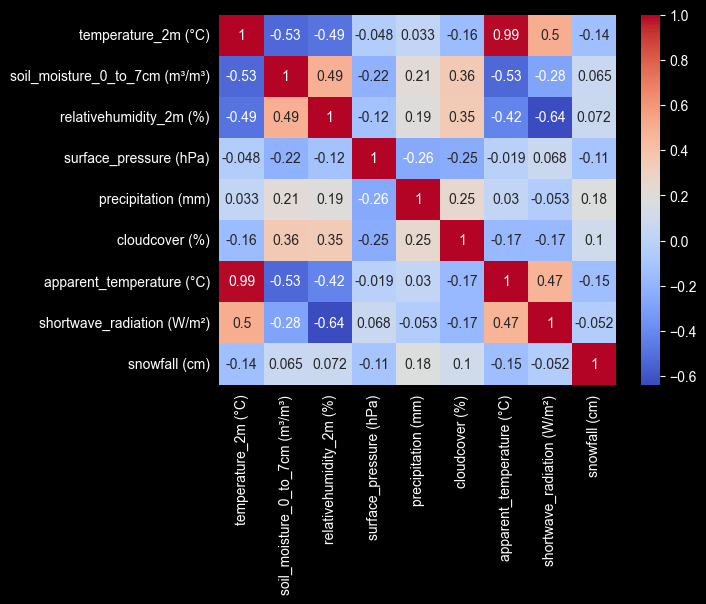

(47914, 6) (191656, 6) (191656,) (47914,)


In [354]:
#snowfall
#aus "einfachheit" nehme ich die gliechentestdaten

xsnow = df[["temperature_2m (°C)",'dewpoint_2m (°C)','cloudcover (%)','pressure_msl (hPa)','soil_moisture_0_to_7cm (m³/m³)','rain (mm)']]
xsnows = df[["temperature_2m (°C)",'soil_moisture_0_to_7cm (m³/m³)','relativehumidity_2m (%)','surface_pressure (hPa)','precipitation (mm)','cloudcover (%)','apparent_temperature (°C)','shortwave_radiation (W/m²)','snowfall (cm)']]

xcorrsnoww = xsnows.corr()
sns.heatmap(xcorrsnoww, annot=True,cmap='coolwarm')
plt.show()
plt.show()

scaler = StandardScaler()
x_scaled_snow = scaler.fit_transform(xsnow)
x_scaled_snow = pd.DataFrame(x_scaled_snow, columns=xsnow.columns)

ysnow = df['snowfall (cm)']

x_train, x_test, y_train, y_test = train_test_split(x_scaled_snow, ysnow, test_size=0.2, random_state=42)#df.plot()
print(x_test.shape,x_train.shape,y_train.shape,y_test.shape)

In [355]:
import tensorflow as tf
from tensorflow.keras import layers

# Modell-Aufbau
fastsnowmodel = tf.keras.Sequential([
    layers.Input(shape=(x_train.shape[1],)),
    layers.Dense(units=1)
])

# Kompilieren mit Optimizer und Verlustfunktion
fastsnowmodel.compile(
    optimizer='adam',
    loss='mean_squared_error',
    metrics=['mae'] # Mittlerer absoluter Fehler zur besseren Lesbarkeit
)

# Training
historyfastsnowmodel = fastsnowmodel.fit(
    x_train, y_train,
    epochs=10,
    batch_size=128,
    validation_split=0.2,
    verbose=1
)

y_pred_snow = fastsnowmodel.predict(x_test)
r2 = r2_score(y_test, y_pred_snow)
print(f"R2-Score fast: {r2:.3f}")

Epoch 1/10
1198/1198 ━━━━━━━━━━━━━━━━━━━━ 1s 748us/step - loss: 0.3356 - mae: 0.3510 - val_loss: 0.0227 - val_mae: 0.0947
Epoch 2/10
1198/1198 ━━━━━━━━━━━━━━━━━━━━ 1s 713us/step - loss: 0.0052 - mae: 0.0363 - val_loss: 0.0012 - val_mae: 0.0111
Epoch 3/10
1198/1198 ━━━━━━━━━━━━━━━━━━━━ 1s 709us/step - loss: 0.0011 - mae: 0.0092 - val_loss: 0.0012 - val_mae: 0.0092
Epoch 4/10
1198/1198 ━━━━━━━━━━━━━━━━━━━━ 1s 708us/step - loss: 0.0011 - mae: 0.0088 - val_loss: 0.0012 - val_mae: 0.0071
Epoch 5/10
1198/1198 ━━━━━━━━━━━━━━━━━━━━ 1s 713us/step - loss: 0.0011 - mae: 0.0088 - val_loss: 0.0012 - val_mae: 0.0098
Epoch 6/10
1198/1198 ━━━━━━━━━━━━━━━━━━━━ 1s 712us/step - loss: 0.0011 - mae: 0.0089 - val_loss: 0.0012 - val_mae: 0.0088
Epoch 7/10
1198/1198 ━━━━━━━━━━━━━━━━━━━━ 1s 718us/step - loss: 0.0011 - mae: 0.0090 - val_loss: 0.0012 - val_mae: 0.0096
Epoch 8/10
1198/1198 ━━━━━━━━━━━━━━━━━━━━ 1s 712us/step - loss: 0.0011 - mae: 0.0090 - val_loss: 0.0012 - val_mae: 0.0089
Epoch 9/10
1198/1198 ━━━

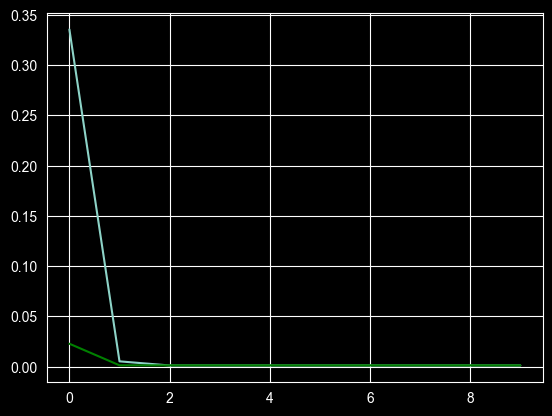

In [356]:
plt.figure()
plt.plot(historyfastsnowmodel.history['loss'])
plt.plot(historyfastsnowmodel.history['val_loss'], label='Validation Loss (MSE)',color='green')